In [1]:
import pandas as pd

In [4]:
data = pd.read_csv("presence3months.csv")

In [6]:
data.head(20)

,Date,Parameter,Value,Unit
0,2020-12-02 02:04:55,PRESENCE,1,NaN
1,2020-12-02 02:09:44,PRESENCE,0,NaN
2,2020-12-02 06:15:31,PRESENCE,1,NaN
3,2020-12-02 06:27:53,PRESENCE,0,NaN
4,2020-12-02 06:33:01,PRESENCE,1,NaN
5,2020-12-02 06:38:22,PRESENCE,0,NaN
6,2020-12-02 06:56:51,PRESENCE,1,NaN
7,2020-12-02 07:01:18,PRESENCE,0,NaN
8,2020-12-02 07:31:10,PRESENCE,1,NaN
9,2020-12-02 07:39:12,PRESENCE,0,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826 entries, 0 to 6825
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6826 non-null   object 
 1   Parameter  6826 non-null   object 
 2   Value      6826 non-null   int64  
 3   Unit       0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.4+ KB


## Look at a specific column

In [9]:
data["Date"]

0       2020-12-02 02:04:55
1       2020-12-02 02:09:44
2       2020-12-02 06:15:31
3       2020-12-02 06:27:53
4       2020-12-02 06:33:01
               ...         
6821    2021-03-19 20:28:03
6822    2021-03-19 20:32:00
6823    2021-03-19 20:37:05
6824    2021-03-19 21:30:13
6825    2021-03-19 21:34:58
Name: Date, Length: 6826, dtype: object

## Convert Date values into datetime stamp

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826 entries, 0 to 6825
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6826 non-null   object 
 1   Parameter  6826 non-null   object 
 2   Value      6826 non-null   int64  
 3   Unit       0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.4+ KB


In [14]:
data["Date"] = pd.to_datetime(data["Date"])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826 entries, 0 to 6825
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6826 non-null   datetime64[ns]
 1   Parameter  6826 non-null   object        
 2   Value      6826 non-null   int64         
 3   Unit       0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 213.4+ KB


## Create new columns

In [15]:
data["Day"] = data["Date"].dt.date
data["time"] = data["Date"].dt.time

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826 entries, 0 to 6825
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6826 non-null   datetime64[ns]
 1   Parameter  6826 non-null   object        
 2   Value      6826 non-null   int64         
 3   Unit       0 non-null      float64       
 4   Day        6826 non-null   object        
 5   time       6826 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 320.1+ KB


## Select the rows where presence is 1 for the first time in the day

### Select the rows where presence is 1 for the first time in the day

In [23]:
start_date = pd.to_datetime("2020-12-02 00:00:00")
end_date = pd.to_datetime("2020-12-03 00:00:00")
last_date = pd.to_datetime("2021-03-19 00:00:00")
first_time = pd.DataFrame()
while end_date < last_date:
    select_start = data_presence[(data_presence["Date"] >= start_date)]
    select_end = select_start[(select_start["Date"] <= end_date)]
    start_date = start_date + pd.Timedelta(days=1)
    end_date = end_date + pd.Timedelta(days=1)
    if select_end.shape == (0, 4):
        continue
    if start_date == pd.to_datetime("2020-12-31 00:00:00"):
        continue
    else:
        top_row = select_end.iloc[0,]
        first_time = first_time.append(top_row)
first_time.to_csv("first_time.csv")

In [24]:
first_time

,Date,Type,Unit,Value
4391,2020-12-02 02:04:55,PRESENCE,NaN,1.0
4457,2020-12-03 05:32:59,PRESENCE,NaN,1.0
4511,2020-12-04 04:33:35,PRESENCE,NaN,1.0
4577,2020-12-05 08:01:38,PRESENCE,NaN,1.0
4651,2020-12-06 05:04:23,PRESENCE,NaN,1.0
...,...,...,...,...
9331,2021-02-21 05:14:32,PRESENCE,NaN,1.0
9381,2021-02-22 06:08:54,PRESENCE,NaN,1.0
9445,2021-02-23 05:55:09,PRESENCE,NaN,1.0
9513,2021-02-24 04:08:27,PRESENCE,NaN,1.0


In [25]:
#Create a new column called Time with only the time as object
first_time["Time"] = first_time["Date"].dt.time
first_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 4391 to 9587
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    79 non-null     datetime64[ns]
 1   Type    79 non-null     object        
 2   Unit    0 non-null      float64       
 3   Value   79 non-null     float64       
 4   Time    79 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 3.7+ KB


### Figure out the average time we go to the kitchen for the 1st time in the day

In [26]:
time_only = pd.to_datetime(first_time["Time"], format='%H:%M:%S') - pd.to_datetime(first_time["Time"], format='%H:%M:%S').dt.normalize()
#Add the column "Time_only" into the first_time dataframe
first_time["Time_only"] = time_only
#Remove column "Time" into the first_time dataframe
first_time = first_time.drop(["Time"], 1)
#Rename the column "Time_only" into "Time"
first_time = first_time.rename(columns={"Time_only":"Time"})

In [27]:
first_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 4391 to 9587
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   Date    79 non-null     datetime64[ns] 
 1   Type    79 non-null     object         
 2   Unit    0 non-null      float64        
 3   Value   79 non-null     float64        
 4   Time    79 non-null     timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), object(1), timedelta64[ns](1)
memory usage: 3.7+ KB


In [28]:
time_only.describe()

count                           79
mean     0 days 04:58:28.329113924
std      0 days 01:14:03.755286257
min                0 days 00:08:44
25%                0 days 04:36:36
50%                0 days 05:12:59
75%         0 days 05:41:14.500000
max                0 days 08:01:38
Name: Time, dtype: object

In [29]:
first_time["Day"] = first_time["Date"].dt.date
first_time["time"] = first_time["Date"].dt.time
first_time

,Date,Type,Unit,Value,Time,Day,time
4391,2020-12-02 02:04:55,PRESENCE,NaN,1.0,0 days 02:04:55,2020-12-02,02:04:55
4457,2020-12-03 05:32:59,PRESENCE,NaN,1.0,0 days 05:32:59,2020-12-03,05:32:59
4511,2020-12-04 04:33:35,PRESENCE,NaN,1.0,0 days 04:33:35,2020-12-04,04:33:35
4577,2020-12-05 08:01:38,PRESENCE,NaN,1.0,0 days 08:01:38,2020-12-05,08:01:38
4651,2020-12-06 05:04:23,PRESENCE,NaN,1.0,0 days 05:04:23,2020-12-06,05:04:23
...,...,...,...,...,...,...,...
9331,2021-02-21 05:14:32,PRESENCE,NaN,1.0,0 days 05:14:32,2021-02-21,05:14:32
9381,2021-02-22 06:08:54,PRESENCE,NaN,1.0,0 days 06:08:54,2021-02-22,06:08:54
9445,2021-02-23 05:55:09,PRESENCE,NaN,1.0,0 days 05:55:09,2021-02-23,05:55:09
9513,2021-02-24 04:08:27,PRESENCE,NaN,1.0,0 days 04:08:27,2021-02-24,04:08:27


<AxesSubplot:xlabel='Day'>

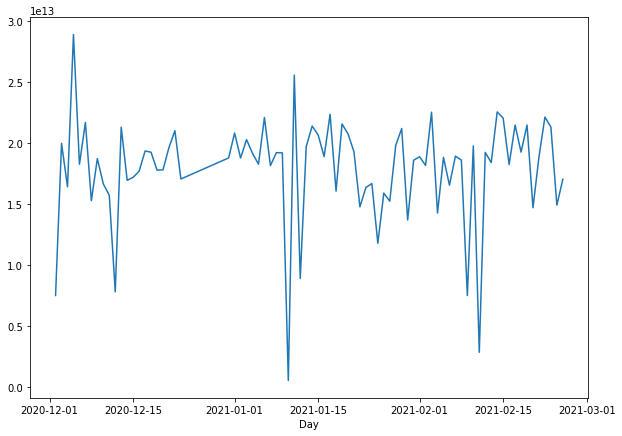

In [46]:
first_time.plot.line(x = "Day", y = "Time", legend = False, figsize = (10,7))

## Group our data by day

In [27]:
#Convert into datetime stamps
presence["Day"] = pd.to_datetime(presence["Day"])
#presence["Time"] = pd.to_datetime(presence["Time"])

In [28]:
presence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826 entries, 0 to 6825
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6826 non-null   datetime64[ns]
 1   Parameter  6826 non-null   object        
 2   Value      6826 non-null   int64         
 3   Day        6826 non-null   datetime64[ns]
 4   Time       6826 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 266.8+ KB


In [45]:
presence_day

,Date,Parameter,Value,Day,Time
Day,,,,,
2020-12-02,2020-12-02 02:04:55,PRESENCE,1,2020-12-02,02:04:55
2020-12-02,2020-12-02 02:09:44,PRESENCE,0,2020-12-02,02:09:44
2020-12-02,2020-12-02 06:15:31,PRESENCE,1,2020-12-02,06:15:31
2020-12-02,2020-12-02 06:27:53,PRESENCE,0,2020-12-02,06:27:53
2020-12-02,2020-12-02 06:33:01,PRESENCE,1,2020-12-02,06:33:01
...,...,...,...,...,...
2021-03-19,2021-03-19 20:28:03,PRESENCE,0,2021-03-19,20:28:03
2021-03-19,2021-03-19 20:32:00,PRESENCE,1,2021-03-19,20:32:00
2021-03-19,2021-03-19 20:37:05,PRESENCE,0,2021-03-19,20:37:05


In [48]:
presence.groupby(presence["Day"])

In [46]:
presence_day.groupby(presence_day.Date.dt.date)

In [47]:
presence_day

,Date,Parameter,Value,Day,Time
Day,,,,,
2020-12-02,2020-12-02 02:04:55,PRESENCE,1,2020-12-02,02:04:55
2020-12-02,2020-12-02 02:09:44,PRESENCE,0,2020-12-02,02:09:44
2020-12-02,2020-12-02 06:15:31,PRESENCE,1,2020-12-02,06:15:31
2020-12-02,2020-12-02 06:27:53,PRESENCE,0,2020-12-02,06:27:53
2020-12-02,2020-12-02 06:33:01,PRESENCE,1,2020-12-02,06:33:01
...,...,...,...,...,...
2021-03-19,2021-03-19 20:28:03,PRESENCE,0,2021-03-19,20:28:03
2021-03-19,2021-03-19 20:32:00,PRESENCE,1,2021-03-19,20:32:00
2021-03-19,2021-03-19 20:37:05,PRESENCE,0,2021-03-19,20:37:05


### Open the file with our selection

In [4]:
presence = pd.read_csv("data3months.csv")

In [5]:
presence.head()

,Unnamed: 0,Date,Parameter,Value,Unit
0,5254,2020-12-02 02:04:55,PRESENCE,1,NaN
1,5255,2020-12-02 02:09:44,PRESENCE,0,NaN
2,5256,2020-12-02 06:15:31,PRESENCE,1,NaN
3,5257,2020-12-02 06:27:53,PRESENCE,0,NaN
4,5258,2020-12-02 06:33:01,PRESENCE,1,NaN


In [6]:
presence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826 entries, 0 to 6825
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6826 non-null   int64  
 1   Date        6826 non-null   object 
 2   Parameter   6826 non-null   object 
 3   Value       6826 non-null   int64  
 4   Unit        0 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 266.8+ KB


In [7]:
#Remove Unnamed and Unit columns
presence = presence.drop(["Unnamed: 0", "Unit"], 1)

In [8]:
presence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826 entries, 0 to 6825
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       6826 non-null   object
 1   Parameter  6826 non-null   object
 2   Value      6826 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 160.1+ KB
